In [1]:
from plotnine import *
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
from pandas.api.types import CategoricalDtype
from Utilities import T_test
plt.rcParams['figure.figsize'] = [20, 8]

## Data filtering

In [2]:
project_df = pd.read_csv('./0803Data/analysis_data.csv',encoding='utf-16')

In [3]:
filtered_df = pd.read_csv('./0803Data/0803_Final_filtered_df.csv',encoding='utf-16')

In [4]:
final_proj = filtered_df['project_id'].unique().tolist()

In [5]:
df = project_df[project_df['project_id'].isin(final_proj)]
df = df.reset_index(drop=True)

## Kickstarter Data explore
- Project duration은 최소 1일부터 ~ 60일 
- Pledge는 project가 live할 때, 언제든지 취소가 가능함 (따라서, 최종적으로 실패했더라도 중간에 project goal을 넘을 수 있음)
- Outlier값이 상당히 많은편, Outlier를 제거하고 box plot을 그리면 뚜렷한 차이가 보임

In [6]:
df = filtered_df.reset_index(drop=True)

### 성공/실패 분류 

In [7]:
Success_df = df[df['success'] == 'success']
Fail_df = df[df['success'] == 'Fail']

In [8]:
print('Success project size : {0}'.format(Success_df.shape[0]))
print('Fail project size : {0}'.format(Fail_df.shape[0]))

Success project size : 500
Fail project size : 500


### Data explore
- 전체로 보는 것은 편차가 너무 큼

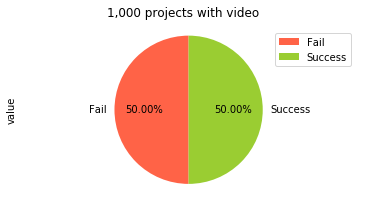

           group  value
Fail        Fail    500
Success  Success    500
Sum : 1000


In [9]:
group = ['Fail','Success']
value = df.groupby(['success'])['success'].count().values
pie_df = pd.DataFrame({'group':group,'value':value}, index=['Fail','Success'])
total_value = pie_df['value'].sum()
fig = pie_df.plot(kind='pie',y='value',subplots=True, figsize=(6, 3),colors = ['tomato','yellowgreen'],\
                title= '1,000 projects with video', autopct='%.2f%%', startangle=90,shadow=False,\
                fontsize=10)[0]
fig_pie = fig.get_figure()
plt.axis('equal')
plt.show()

fig_pie.savefig('Fig1.pdf')
print(pie_df)
print('Sum : {0}'.format(pie_df['value'].sum()))

### 전체 Data의 Project별 Category 숫자

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 14 x 6 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Project categories histogram.pdf
  warn('Filename: {}'.format(filename))


<Figure size 72x576 with 0 Axes>

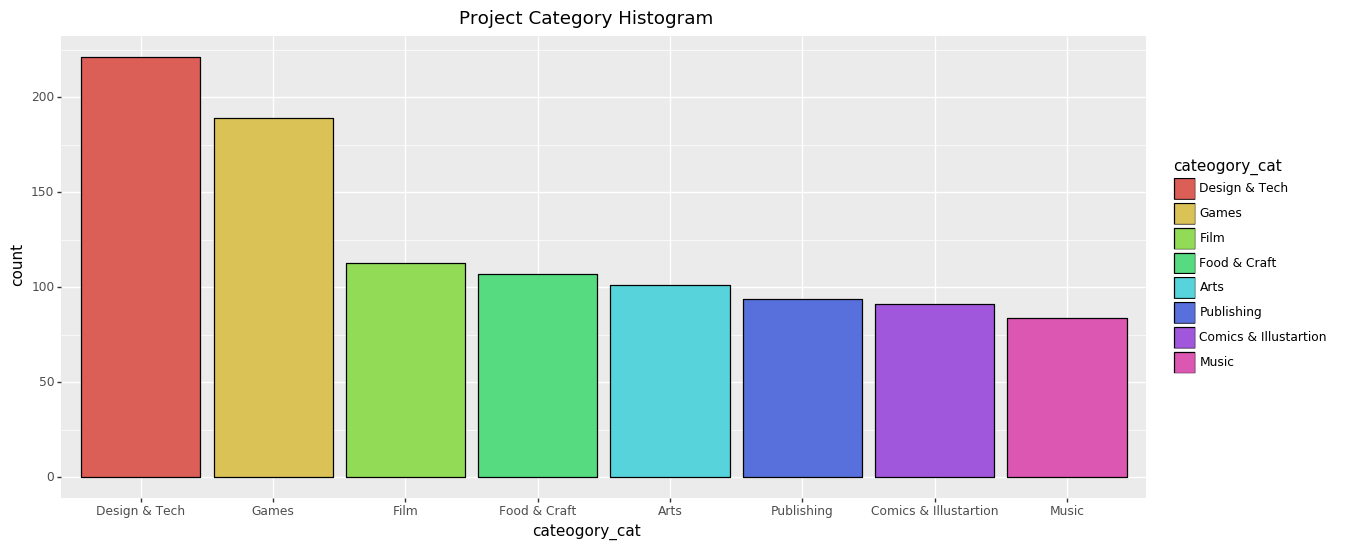

<ggplot: (279849150)>

In [10]:
# Determine order and create a categorical type
cateogory_list = df['super_category'].value_counts().index.tolist()
cateogory_cat = CategoricalDtype(categories=cateogory_list, ordered=True)
df['cateogory_cat'] = df['super_category'].astype(str).astype(cateogory_cat)

plt.rcParams['figure.figsize'] = [1, 8]
fig = plt.figure()

# graph 객체 생성
cate_hist = ggplot(df, aes('cateogory_cat',fill='cateogory_cat')) \
    + geom_bar(colour="black") \
    + ggtitle('Project Category Histogram') \
    + theme(figure_size=(14, 6))
cate_hist.save('Project categories histogram.pdf')
cate_hist

In [11]:
# Total
print(pd.DataFrame(df.groupby(['cateogory_cat'])['cateogory_cat'].count())['cateogory_cat'].sum())
pd.DataFrame(df.groupby(['cateogory_cat'])['cateogory_cat'].count())

1000


,cateogory_cat
cateogory_cat,
Design & Tech,221
Games,189
Film,113
Food & Craft,107
Arts,101
Publishing,94
Comics & Illustartion,91
Music,84


### 성공/실패 Project별 Category 숫자

In [12]:
# success_dict = {1:'Success',0:"Fail"}
# df['Success'] = df['Success'].map(success_dict)

/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 14 x 6 in image.
  from_inches(height, units), units))
/Users/yonggeol/miniconda3/envs/py/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: Project categories histogram by success.pdf
  warn('Filename: {}'.format(filename))


<Figure size 72x576 with 0 Axes>

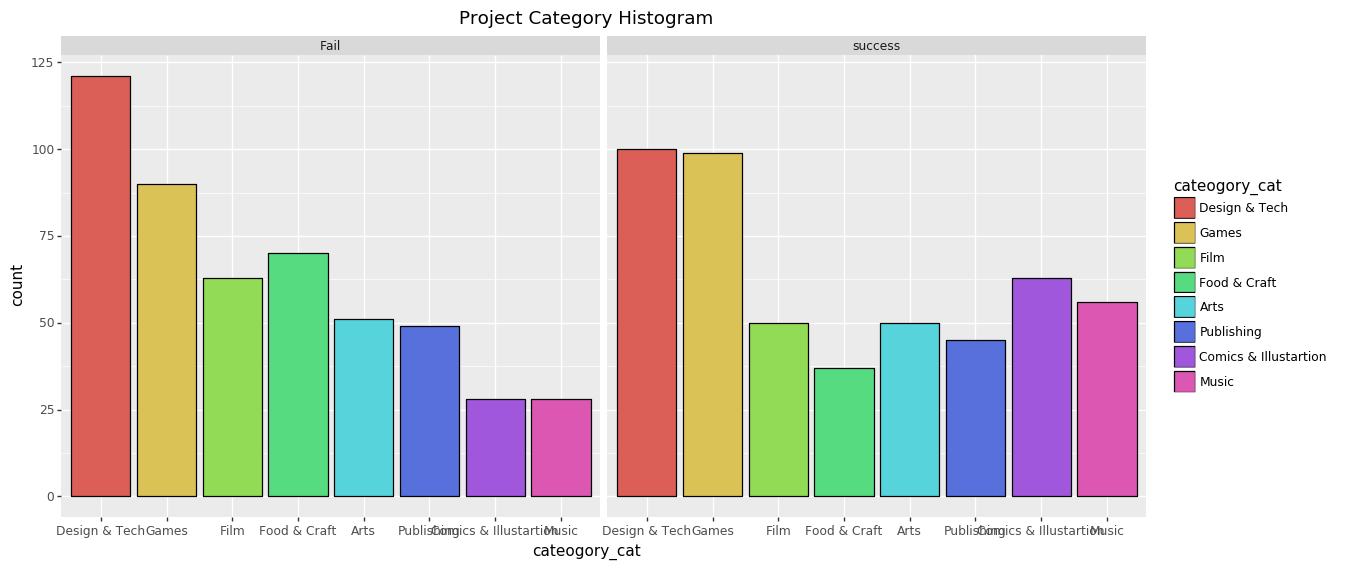

<ggplot: (-9223372036574840632)>

In [13]:
plt.rcParams['figure.figsize'] = [1, 8]
fig = plt.figure()


# graph 객체 생성
com_plot = ggplot(df, aes('cateogory_cat',fill='cateogory_cat')) \
    + geom_bar(colour="black") \
    + ggtitle('Project Category Histogram') \
    + theme(figure_size=(14, 6))\
    + facet_wrap('~success')
com_plot.save('Project categories histogram by success.pdf')
com_plot

In [14]:
Success_df = df[df['success'] == 'success']
Fail_df = df[df['success'] == 'Fail']

In [15]:
# success
print('success')
Success_df.groupby(['cateogory_cat'])['cateogory_cat'].count()
print(pd.DataFrame(Success_df.groupby(['cateogory_cat'])['cateogory_cat'].count())['cateogory_cat'].sum())
pd.DataFrame(Success_df.groupby(['cateogory_cat'])['cateogory_cat'].count())
#print(pd.DataFrame(Success_df.groupby(['cateogory_cat'])['cateogory_cat'].count()).sum())

success
500


,cateogory_cat
cateogory_cat,
Design & Tech,100
Games,99
Film,50
Food & Craft,37
Arts,50
Publishing,45
Comics & Illustartion,63
Music,56


In [16]:
# fails
print('fail')
Fail_df.groupby(['cateogory_cat'])['cateogory_cat'].count()
print(pd.DataFrame(Fail_df.groupby(['cateogory_cat'])['cateogory_cat'].count())['cateogory_cat'].sum())
pd.DataFrame(Fail_df.groupby(['cateogory_cat'])['cateogory_cat'].count())
#print(pd.DataFrame(Fail_df.groupby(['cateogory_cat'])['cateogory_cat'].count()).sum())

fail
500


,cateogory_cat
cateogory_cat,
Design & Tech,121
Games,90
Film,63
Food & Craft,70
Arts,51
Publishing,49
Comics & Illustartion,28
Music,28
